<a href="https://colab.research.google.com/github/ren-vera/EA-2-CS/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

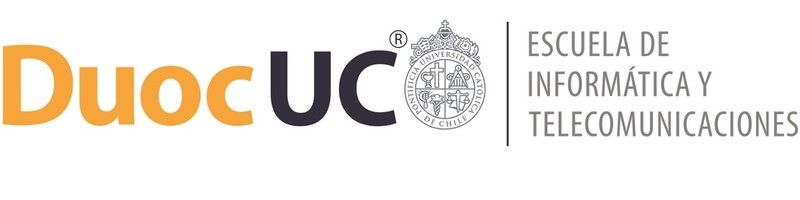

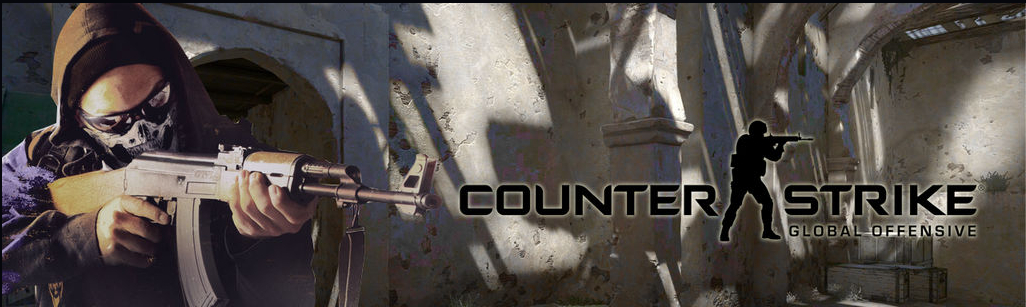

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Nicolas Silva
Renato Vera

Docente:  Giocrisrai Godoy   

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, nos ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [3]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.


#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')



<ipython-input-3-c5fd8b88758c>:18: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0


Cantidad de registros: 79,157 filas.

Cantidad de columnas: 30 columnas.

Variables:
Objetos (texto): Map, Team, RoundWinner, MatchWinner, TimeAlive, TravelledDistance, FirstKillTime.

Numéricas:

Enteros: muchos contadores como MatchKills, RoundKills, RLethalGrenadesThrown.

Booleanas: Survived, AbnormalMatch.

Algunos problemas: TimeAlive y TravelledDistance son tipo object cuando deberían ser números.



La industria de los videojuegos competitivos, Counter-Strike, genera una enorme cantidad de datos en cada partida: muertes, asistencias, compras de equipo, desplazamientos en el mapa, tiempos de supervivencia, entre otros.
Analizar estos datos es esencial para entender patrones de juego, optimizar estrategias de equipo, balancear el juego o incluso desarrollar sistemas automáticos de predicción de resultados.

El dataset entregado contiene información sobre eventos de rondas de partidas jugadas, permitiendo observar múltiples variables que influyen en el desempeño de los equipos y jugadores.

Queremos analizar datos de rondas de partidas FPS para construir modelos de predicción de desempeño de los jugadores, utilizando técnicas de machine learning (clasificación y regresión), luego de realizar transformaciones necesarias a los datos.
nuestra hipotesis es que arma es usada para hacer mas kills en la cantidad total de rondas








Objetivo de regresión: El objetivo de la tarea de regresión es predecir cuántas eliminaciones (RoundKills) realizará un jugador en una ronda, utilizando como variables predictoras características relacionadas con su equipamiento, desempeño y dinámica de juego durante la partida.


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [4]:
#cargar archivo base de datos del drive
pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')
df = pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')
df.head()

<ipython-input-4-131ac80f3224>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')
<ipython-input-4-131ac80f3224>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Anexo ET_demo_round_traces_2022.csv', sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
import pandas as pd

def verificar_columnas_vacias(df):
  """Verifica las columnas de un DataFrame de pandas y señala cuáles tienen datos vacíos.

  Args:
    df: El DataFrame de pandas para verificar.

  Returns:
    None. Imprime los nombres de las columnas con datos vacíos y la cantidad de valores nulos.
  """

  print("Columnas con datos vacíos:")
  for columna in df.columns:
    num_vacios = df[columna].isnull().sum()
    if num_vacios > 0:
      print(f"  {columna}: {num_vacios} valores vacíos")

# Ejemplo de uso:
df = pd.DataFrame({'A': [1, 2, None, 4],
                   'B': [5, 6, 7, 8],
                   'C': [9, None, 11, 12]})

verificar_columnas_vacias(df)

Columnas con datos vacíos:
  A: 1 valores vacíos
  C: 1 valores vacíos


In [ ]:
# 2. Identificar una columna con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()]
print("Columnas con valores nulos:", columnas_con_nulos.tolist())



Columnas con valores nulos: ['Team', 'MatchWinner']


In [ ]:
#conociendo los tipos de datos
#total de atributos encontrados en la fuente de datos
num_columnas = len(df.columns)
print("Número total de atributos en la fuente de datos es de:", num_columnas)
print("---------------------------------------------------------------------------------------------------------------------------")
#total de atributos categoricos
categorica = df.select_dtypes(include=['object']).columns.tolist()
num_categoricas = len(categorica)
print("Número total de atributos categoricos en la fuente de datos es de:", num_categoricas)
print("los nombres de los atributos categoricos son:", categorica)
print("---------------------------------------------------------------------------------------------------------------------------")
#total atributos numericos
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_numericas = len(num_cols)
print("Número total de atributos numericos en la fuente de datos es de:", num_numericas)
print("los nombres de los atributos numericos son:", num_cols)
print("---------------------------------------------------------------------------------------------------------------------------")
total_registros = df.shape[0]
print("El total de registros en la fuente de datos es de:", total_registros)


Número total de atributos en la fuente de datos es de: 30
---------------------------------------------------------------------------------------------------------------------------
Número total de atributos categoricos en la fuente de datos es de: 7
los nombres de los atributos categoricos son: ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']
---------------------------------------------------------------------------------------------------------------------------
Número total de atributos numericos en la fuente de datos es de: 21
los nombres de los atributos numericos son: ['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAss

In [ ]:
#se describen el tipo de datos y su null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
#se obtiene el resumen estadistico de las tablas
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
#identificamos las medias de posicion al calcular la mediana, moda, desviacion estandar
#media aritmetica, la varianza y datos unicos

numeric_df = df.select_dtypes(include=['number'])

print('mediana:', numeric_df.median())
print('---------------------------------------------------------------------------------------------------------------------------')
print('moda:', numeric_df.mode())
print('---------------------------------------------------------------------------------------------------------------------------')
print('desviacion estandar:', numeric_df.std())
print('---------------------------------------------------------------------------------------------------------------------------')
#media aritmetica x fila
numeric_df.mean(axis=1).head()
print('---------------------------------------------------------------------------------------------------------------------------')
print('varianza:', numeric_df.var())
print('---------------------------------------------------------------------------------------------------------------------------')
#datos unicos
for columna in df.columns:
  print('\nEstadistica de la columna {0}'.format(columna))
  print(df[columna].value_counts())
  print(df[columna].unique())

mediana: Unnamed: 0                     56720.0
InternalTeamId                     2.0
MatchId                          236.0
RoundId                           12.0
RLethalGrenadesThrown              0.0
RNonLethalGrenadesThrown           1.0
PrimaryAssaultRifle                1.0
PrimarySniperRifle                 0.0
PrimaryHeavy                       0.0
PrimarySMG                         0.0
PrimaryPistol                      0.0
RoundKills                         0.0
RoundAssists                       0.0
RoundHeadshots                     0.0
RoundFlankKills                    0.0
RoundStartingEquipmentValue     4700.0
TeamStartingEquipmentValue     22550.0
MatchKills                         8.0
MatchFlankKills                    1.0
MatchAssists                       1.0
MatchHeadshots                     3.0
dtype: float64
---------------------------------------------------------------------------------------------------------------------------
moda:        Unnamed: 0  Internal

In [5]:
import pandas as pd
#Crear objetivo de Clasificación: "BuenaRonda"
#Si hizo más de 2 kills en la ronda, es una buena ronda (1), si no (0)
df['BuenaRonda'] = df['RoundKills'].apply(lambda x: 1 if x > 2 else 0)


#Guardar el nuevo dataset
df.to_csv('ET_demo_round_traces_with_targets.csv', index=False)

print("Archivo guardado como 'ET_demo_round_traces_with_targets.csv' con los nuevos objetivos.")


Archivo guardado como 'ET_demo_round_traces_with_targets.csv' con los nuevos objetivos.


In [6]:
# Análisis de BuenaRonda
BuenaRonda_counts = df['BuenaRonda'].value_counts()
BuenaRonda_percentage = df['BuenaRonda'].value_counts(normalize=True) * 100

print("Distribución de BuenaRonda:")
print(BuenaRonda_counts)
print("\nPorcentaje de BuenaRonda:")
print(BuenaRonda_percentage)


Distribución de BuenaRonda:
BuenaRonda
0    75652
1     3505
Name: count, dtype: int64

Porcentaje de BuenaRonda:
BuenaRonda
0    95.572091
1     4.427909
Name: proportion, dtype: float64


Cuántas rondas fueron "buenas" (1) y cuántas "no buenas" (0).

El porcentaje de cada categoría.

In [ ]:
# calcular la correlacion de solo las variables numericas.
correlacion = df.select_dtypes(include=['number']).corr()
print(correlacion)


                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006337  0.003769 -0.003975   
PrimarySMG                     0.017790        0.004186  0.017847 -0.029860   
PrimaryPistol                 -0.002799       -0.032361 -0.002753 -0.107013   
RoundKills                     0.003284        0.033

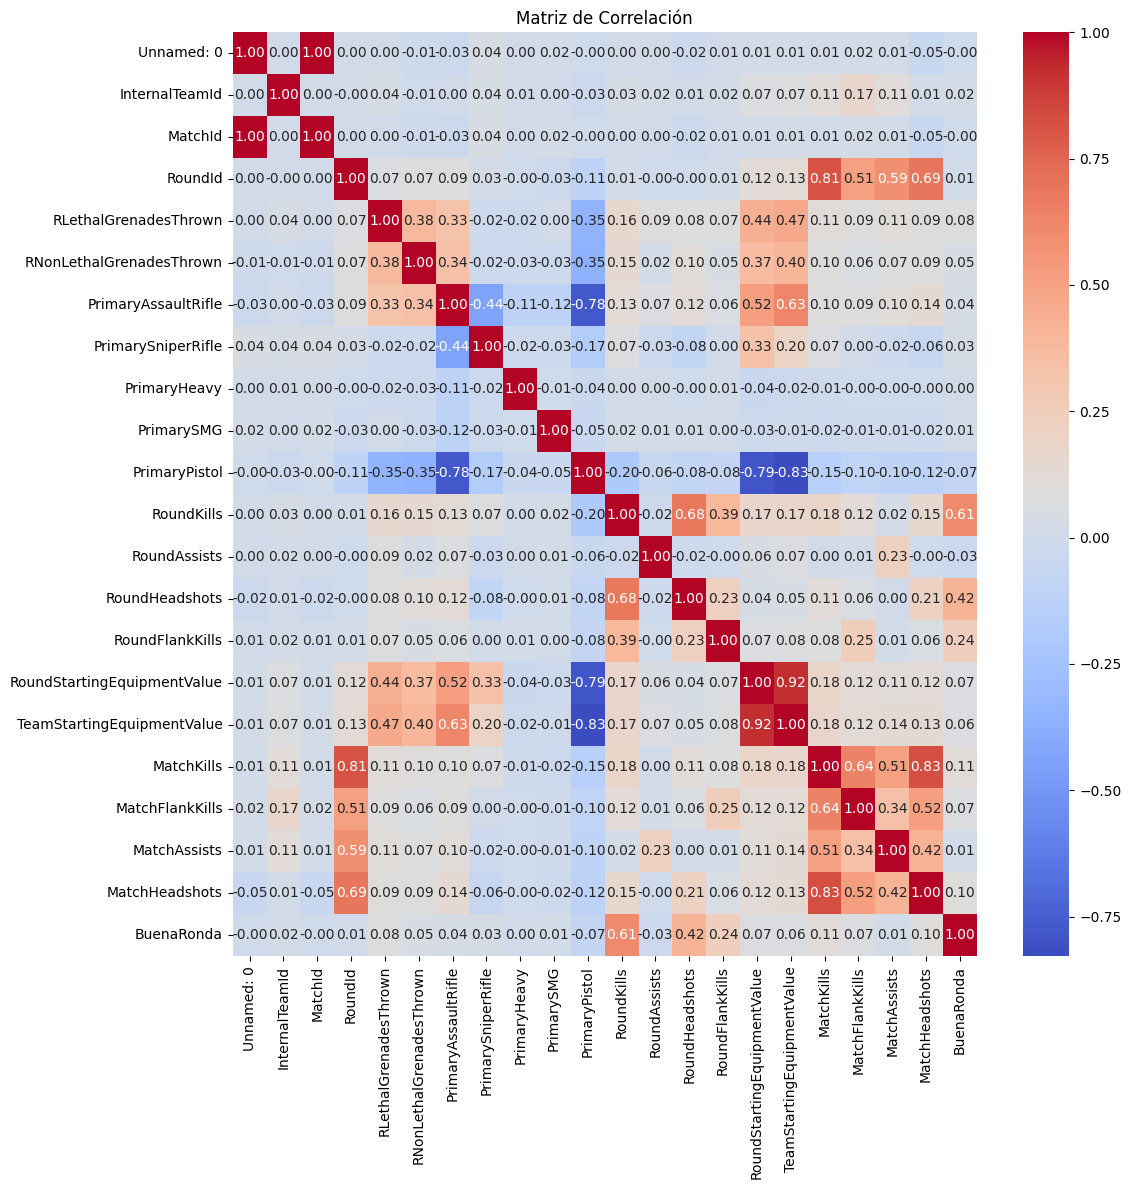

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


PrimaryPistol con PrimaryAssaultRifle = -0.78
Fuerte correlación negativa: si se usa una, no se usa la otra (son armas principales excluyentes).




In [ ]:
filtered_df = df.select_dtypes(include=['number'])
filtered_df = df[['RoundKills','PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']]
#calcular que arma se utiliza mas por roundkills



In [ ]:
# Filtrar solo las columnas relevantes
filtered_df = df[['RoundKills', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']]

# Sumar los RoundKills por tipo de arma
# Para eso, multiplicamos RoundKills por cada tipo de arma (suponiendo que cada columna de arma indica si fue usada o no, 0 o 1)
arma_kills = {}

for arma in ['PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']:
    arma_kills[arma] = (filtered_df['RoundKills'] * filtered_df[arma]).sum()

# Convertir a DataFrame para verlo ordenado
arma_kills_df = pd.DataFrame.from_dict(arma_kills, orient='index', columns=['TotalKills'])
arma_kills_df = arma_kills_df.sort_values(by='TotalKills', ascending=False)

# Mostrar el arma más usada
arma_mas_usada = arma_kills_df.idxmax()

print("Arma más utilizada basada en RoundKills:")
print(arma_mas_usada)
print(arma_kills_df)




Arma más utilizada basada en RoundKills:
TotalKills    PrimaryAssaultRifle
dtype: object
                       TotalKills
PrimaryAssaultRifle  40033.643224
PrimarySniperRifle    6184.080882
PrimaryPistol         6117.000000
PrimarySMG             481.442606
PrimaryHeavy           325.833288


<ipython-input-68-d259e8ebb3e6>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


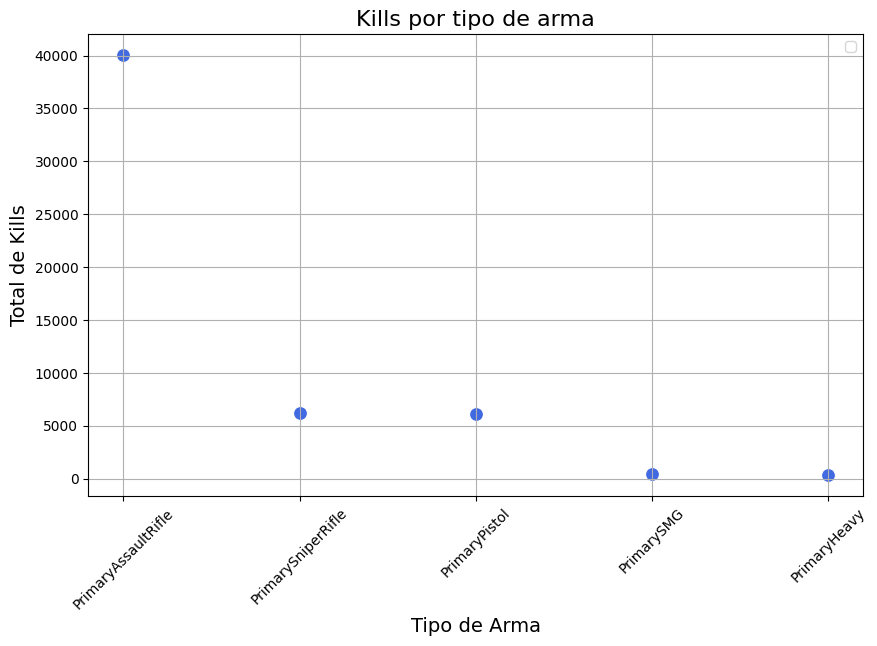

In [ ]:
#3. **¿Ciertos tipos de armas primarias favorecen la mayoria de kills por ronda?**
#- Variable objetivo: `RoundKills`
#- Predictoras: `PrimaryRifle`, `PrimarySMG`, `Kills`, `HeadShots`


import matplotlib.pyplot as plt
import seaborn as sns

# Crear el scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=arma_kills_df.index, y=arma_kills_df['TotalKills'], s=100, color='royalblue')

#gráfico
plt.title('Kills por tipo de arma', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=14)
plt.ylabel('Total de Kills', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.legend()
plt.show()


El objetivo de la tarea de regresión es predecir cuántas eliminaciones (RoundKills) realizará un jugador en una ronda, utilizando como variables predictoras características relacionadas con su equipamiento, desempeño y dinámica de juego durante la partida.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [15]:
X = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'Team', 'Map']]
y = df['RoundKills']

X = pd.get_dummies(X)  # Convertir categóricas a numéricas



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [18]:
y_pred = model.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
#El modelo presenta un error cuadrático medio de aproximadamente 0.77, indicando que, en promedio, las predicciones de kills por ronda difieren del valor real en menos de un kill.


Error cuadrático medio: 0.771108604901863


## Fase 3: Data Preparation

In [ ]:
df2 = df.copy()
df2



,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,BuenaRonda
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,750,4400,0,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,800,4400,0,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,1000,4400,0,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,850,4400,0,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,1000,4400,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,5600,27100,4,0,2,2,0
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,1,0,5500,27100,8,5,1,3,0
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,4950,27100,5,0,2,3,0
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,4950,27100,1,0,1,0,0


In [ ]:
#eliminamos las variables que no usaremos
df2.drop(['MatchId', 'RoundId', 'InternalTeamId'], axis=1, inplace=True)
df2.head()

,Unnamed: 0,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,BuenaRonda
0,600,de_inferno,Terrorist,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,0,0,750,4400,0,0,0,0,0
1,601,de_inferno,Terrorist,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,0,0,800,4400,0,0,0,0,0
2,602,de_inferno,Terrorist,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,0,0,1000,4400,0,0,0,0,0
3,603,de_inferno,Terrorist,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,0,0,850,4400,0,0,0,0,0
4,604,de_inferno,Terrorist,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,0,0,1000,4400,0,0,0,0,0


In [ ]:
#transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)
df2.head()


<ipython-input-71-bb2c457f5a30>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
<ipython-input-71-bb2c457f5a30>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_n

,Unnamed: 0,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,BuenaRonda
0,600,1,1.0,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,0,0,750,4400,0,0,0,0,0
1,601,1,1.0,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,0,0,800,4400,0,0,0,0,0
2,602,1,1.0,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,0,0,1000,4400,0,0,0,0,0
3,603,1,1.0,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,0,0,850,4400,0,0,0,0,0
4,604,1,1.0,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,0,0,1000,4400,0,0,0,0,0


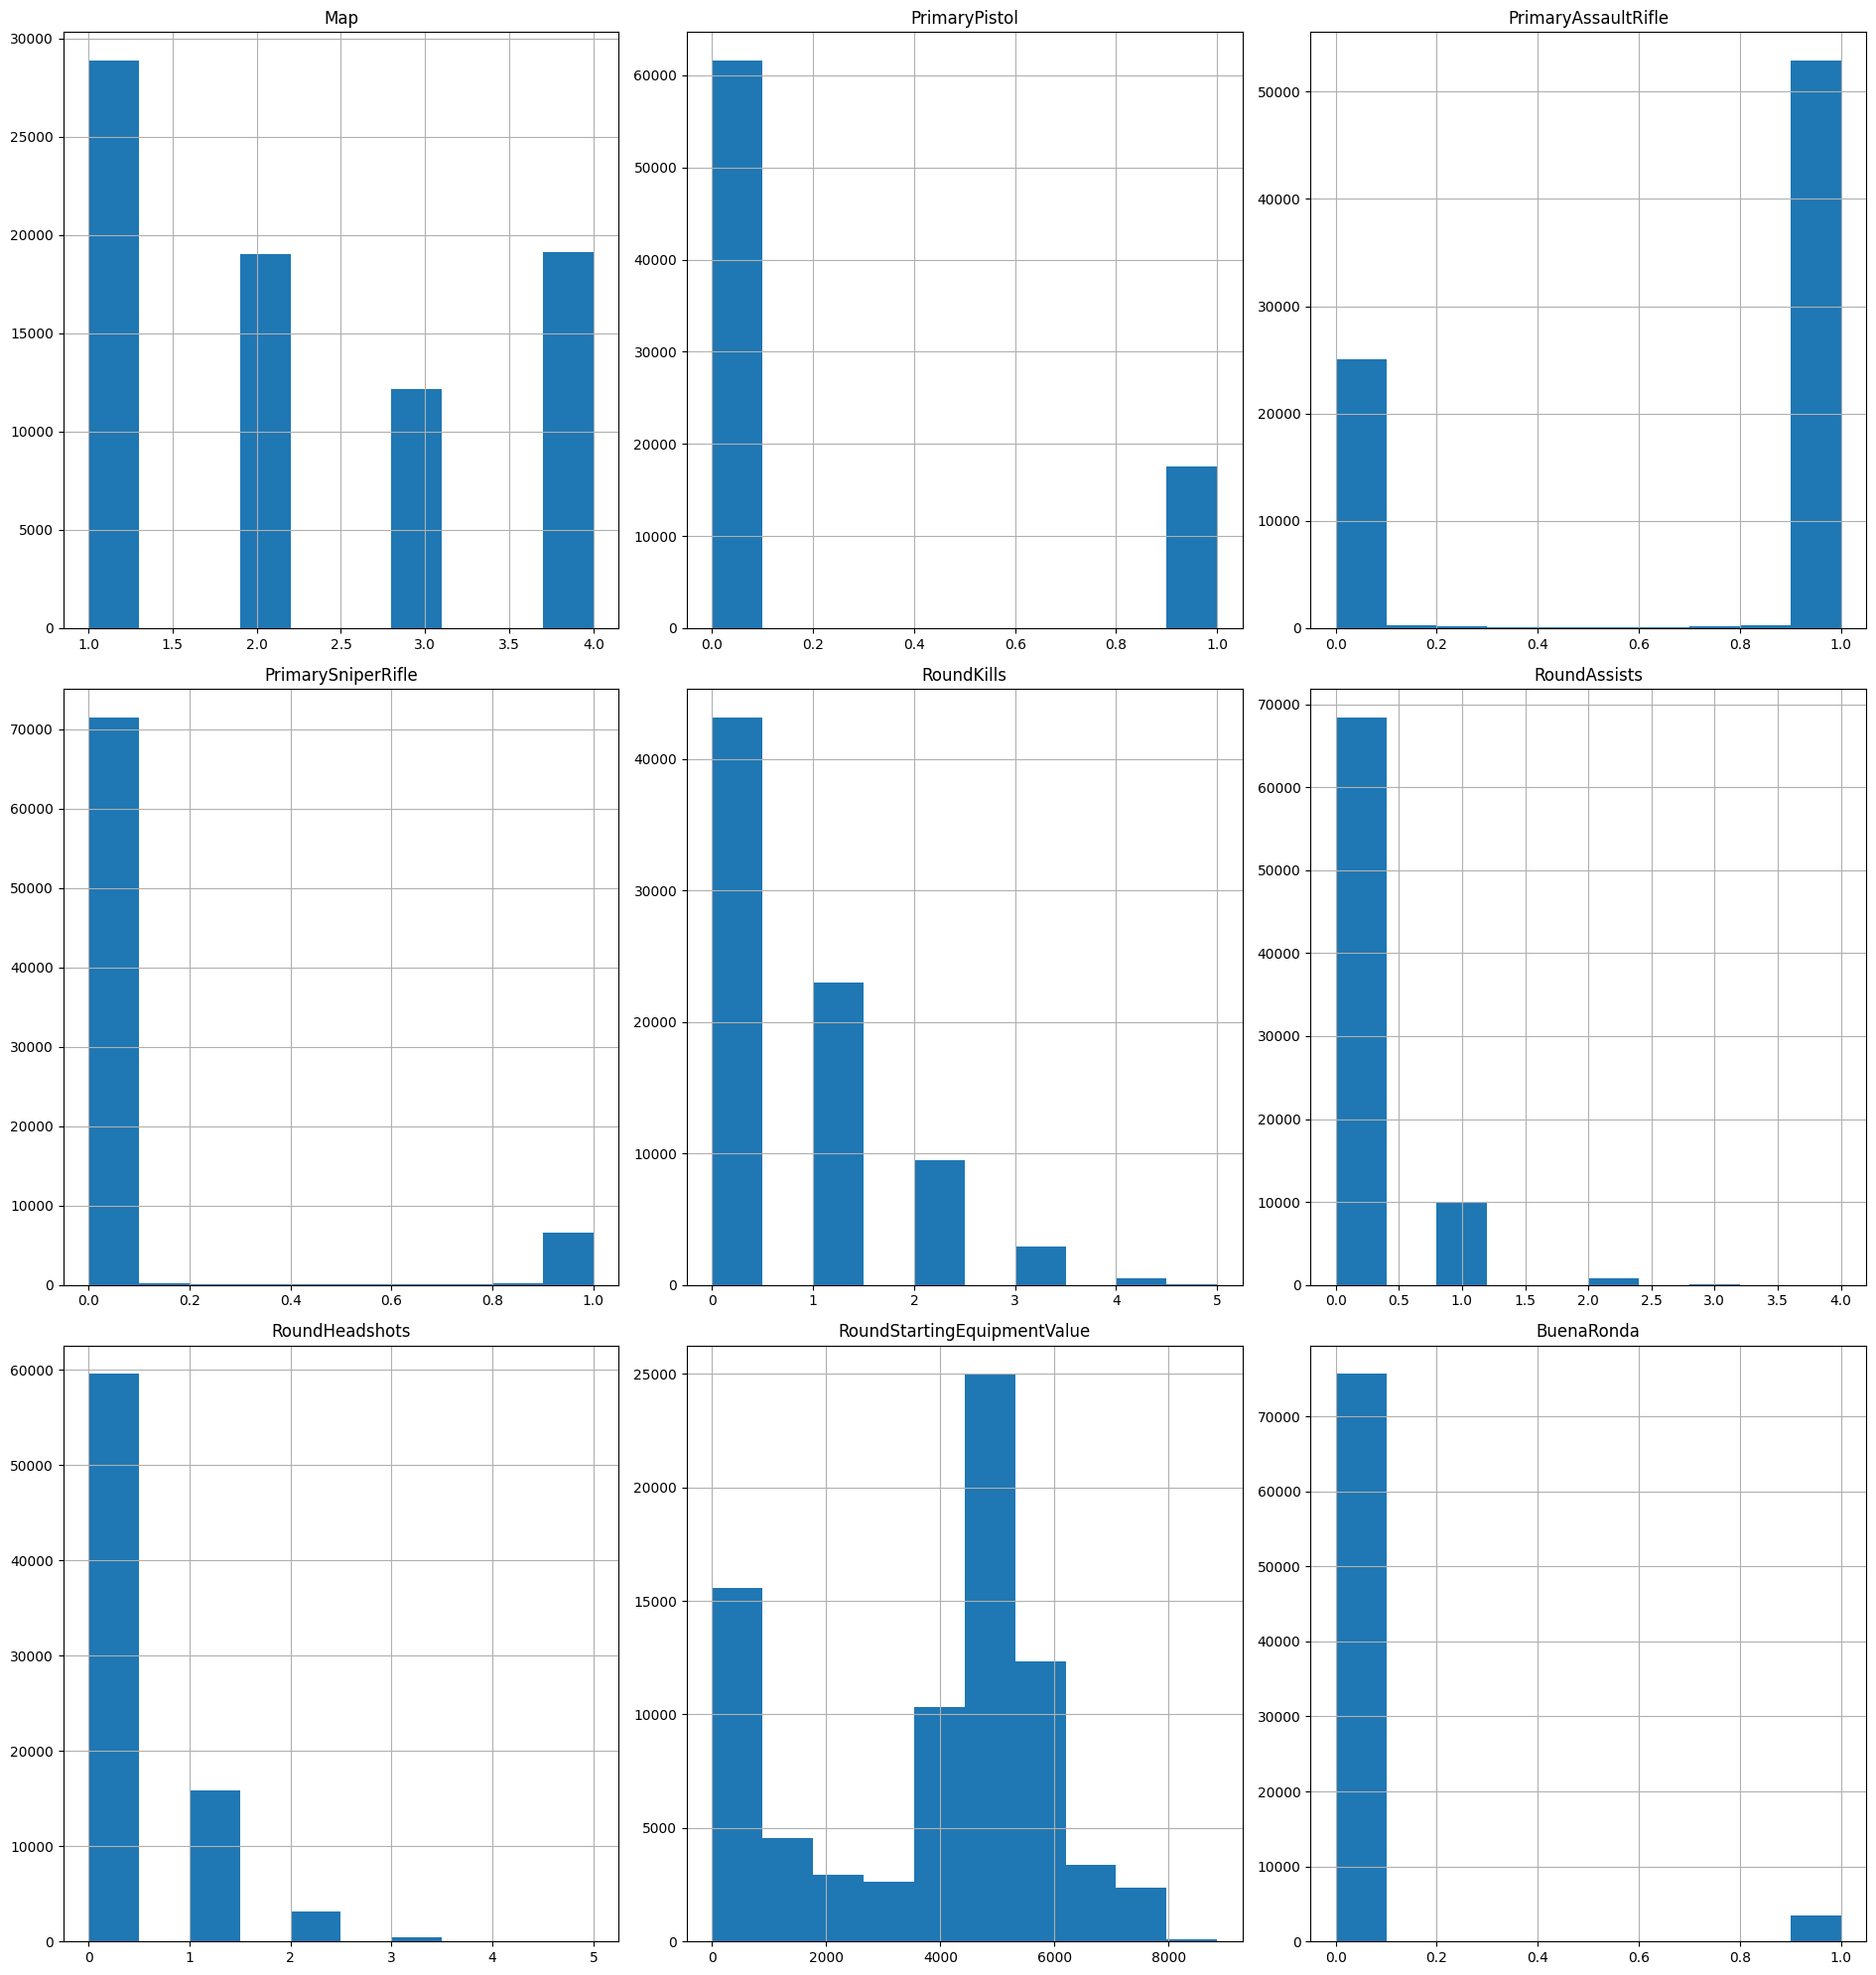

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.
import matplotlib.pyplot as plt
#crear una copia de data_frame para la limpieza

#seleccionar las variables numericas
variables_numericas = ['Map', 'RoundWinner', 'Survived',
                       'TimeAlive', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'FirstKillTime', 'RoundKills',
                       'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'BuenaRonda']



#eliminar las variables no deseadas del dataframe
data_frame_filtrado = df2.drop(['Team', 'MatchWinner'], axis=1)

#generar histogramas para las variables restantes
data_frame_filtrado[variables_numericas].hist(figsize=(19, 20))
plt.tight_layout()
plt.show()

GRAFICOS EN DONDE SE MUESTRAN LAS ID DE FORMA INDEPENDIENTE Y LOS RESULTADOS DE LOS MOVIMIENTOS DE  CADA JUGADOR
RLehalGrenadesThrown indica	Cuántas granadas letales lanzó un jugador en una ronda. Casi siempre entre 0 y 2 granadas.
PrimaryAssaultRifle Indica si el arma principal era un rifle de asalto, Muchos jugadores sí usan rifles.
RoundKills	indica Cuántas kills consiguió un jugador en una ronda. La mayoría consigue 0-1 kills por ronda.

In [ ]:
correlacion1= df2.select_dtypes(include=['number']).corr()
print(correlacion)

                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006337  0.003769 -0.003975   
PrimarySMG                     0.017790        0.004186  0.017847 -0.029860   
PrimaryPistol                 -0.002799       -0.032361 -0.002753 -0.107013   
RoundKills                     0.003284        0.033

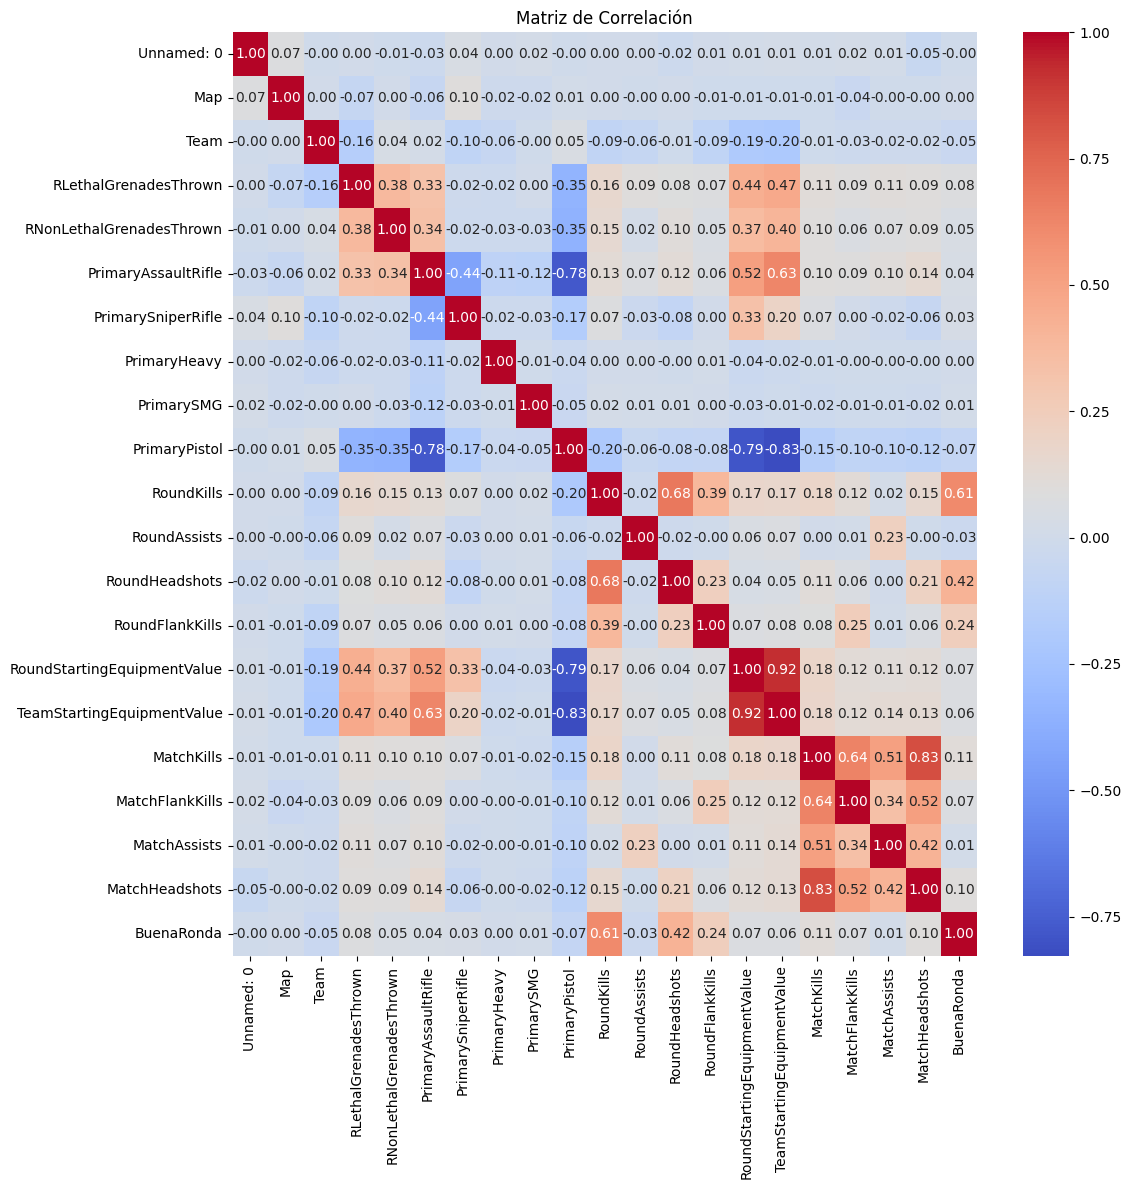

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlacion1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


correlacion mas limpia del df2